In [97]:
""" This program takes input from the scores database table (currently csv, later sql).
 Given a list of player IDs, it generates tables that attempt to make 4 or 5
 player tables of people who have played each other the least."""
#Uploaded to Github 8/10/15

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from __future__ import division
import itertools
from itertools import combinations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

todays_players = [40,6,23,26,15,
                  98,1,10,55,16,
                  56,97,96,12]

In [2]:
scores_table = pd.read_csv('MahjongScores.csv')

In [3]:
scores_table.head()

,ScoreId,GameId,PlayerId,Rank,RawScore,Score,Unnamed: 6
0,1,1,23,1,0,38,NaN
1,2,1,52,2,0,13,NaN
2,3,1,6,3,0,-9,NaN
3,4,1,98,4,0,-42,NaN
4,5,2,6,1,0,30,NaN


In [4]:
scores_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2524 entries, 0 to 2523
Data columns (total 7 columns):
ScoreId       2524 non-null int64
GameId        2524 non-null int64
PlayerId      2524 non-null int64
Rank          2524 non-null int64
RawScore      2524 non-null int64
Score         2524 non-null int64
Unnamed: 6    0 non-null float64
dtypes: float64(1), int64(6)
memory usage: 157.8 KB


In [5]:
#See what playerID looks like
print scores_table['PlayerId'].min()
print scores_table['PlayerId'].max()

1
98


In [6]:
# 6th column is extra, drop it
scores_table.drop([scores_table.columns[6]], axis=1, inplace=True) # Note: zero indexed
scores_table.head()

,ScoreId,GameId,PlayerId,Rank,RawScore,Score
0,1,1,23,1,0,38
1,2,1,52,2,0,13
2,3,1,6,3,0,-9
3,4,1,98,4,0,-42
4,5,2,6,1,0,30


In [7]:
games_rows = pd.DataFrame()

# Pull all rows with games for each of today's players
for i in todays_players:
    games_rows = games_rows.append(scores_table.loc[(scores_table['PlayerId'] == i)])

# Make a list of just unique games
uniquegames = games_rows['GameId'].unique()

In [8]:
# Create zeros dataframe of (#players,#players) size for matchups
num_players = len(todays_players)
matchups_df = DataFrame(np.zeros(num_players**2).reshape(num_players,num_players))
matchups_df.index = todays_players
matchups_df.columns = todays_players

# Populate matchups table one game at a time
for gameid in uniquegames:
    gameid_players = []
    relevant_rows = games_rows.loc[(games_rows['GameId'] == gameid)] # Pull the row for each player in that game
    gameid_players = relevant_rows['PlayerId'].tolist() #Give each player an index
    for i in range(0,len(gameid_players)): # For each player in that game
        for j in range(i,len(gameid_players)): # Look for opponent (may be self)
            matchups_df.loc[gameid_players[i]].loc[gameid_players[j]] += 1 # Add 1 to the column that player is in
                
# Diagonals should be total # of games played for that player
matchups_df

,40,6,23,26,15,98,1,10,55,16,56,97,96,12
40,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,68,21,0,0,22,1,0,8,1,0,0,0,4
23,0,0,125,1,0,48,0,1,18,2,3,0,1,17
26,0,0,0,4,0,1,0,0,0,0,0,0,0,0
15,0,0,0,0,1,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,163,1,1,21,0,6,0,0,24
1,0,0,0,0,0,0,11,1,3,0,1,0,0,1
10,0,0,0,0,0,0,0,11,2,0,1,0,0,1
55,0,0,0,0,0,0,0,0,100,1,7,0,0,5
16,0,0,0,0,0,0,0,0,0,6,0,0,0,0


In [9]:
for i in range(0,matchups_df.shape[0]):
    for j in range(0,matchups_df.shape[1]):
        if (i != j) & (j > i): #Convert numbers above diagonal to percentages
            matchups_df.iloc[i].iloc[j] = (matchups_df.iloc[i].iloc[j] / matchups_df.iloc[i].iloc[i]) * 100

In [10]:
matchups_df

,40,6,23,26,15,98,1,10,55,16,56,97,96,12
40,1,0,0.000000,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000,0.000000
6,0,68,30.882353,0.0,0,32.352941,1.470588,0.000000,11.764706,1.470588,0.000000,0,0.000,5.882353
23,0,0,125.000000,0.8,0,38.400000,0.000000,0.800000,14.400000,1.600000,2.400000,0,0.800,13.600000
26,0,0,0.000000,4.0,0,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000,0.000000
15,0,0,0.000000,0.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000,0.000000
98,0,0,0.000000,0.0,0,163.000000,0.613497,0.613497,12.883436,0.000000,3.680982,0,0.000,14.723926
1,0,0,0.000000,0.0,0,0.000000,11.000000,9.090909,27.272727,0.000000,9.090909,0,0.000,9.090909
10,0,0,0.000000,0.0,0,0.000000,0.000000,11.000000,18.181818,0.000000,9.090909,0,0.000,9.090909
55,0,0,0.000000,0.0,0,0.000000,0.000000,0.000000,100.000000,1.000000,7.000000,0,0.000,5.000000
16,0,0,0.000000,0.0,0,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0,0.000,0.000000


In [11]:
# Determine types of tables for today (whether there are 5 person tables or not)
if num_players < 8:
    total_tables = 1
else:
    table_det = num_players%4
    if table_det == 0:
        tables_4p = num_players/4
        tables_5p = 0
    elif table_det == 1:
        tables_4p = (num_players-1)/4
        tables_5p = 1
    elif table_det == 2:
        tables_4p = (num_players-2)/4
        tables_5p = 2
    elif table_det == 3:
        tables_4p = (num_players-3)/4
        tables_5p = 3
    total_tables = tables_4p + tables_5p

In [12]:
tables = []
tables_5p_made = 0
table_sums = []
temp_playerlist = list(todays_players) # Make a copy of today's players to use

while (len(temp_playerlist) > (4 + tables_5p)): #Keep going until pool is smaller than 4-8
    # Generated list of combinations
    if tables_5p_made < tables_5p:
        table_combs = list(itertools.combinations(temp_playerlist,5))
        tables_5p_made += 1
    else:
        table_combs = list(itertools.combinations(temp_playerlist,4))

    # Calculate table matchmaking rating (lower means players have fewer games together)
    for table in table_combs:
        table_mm = 0
        for i in table:
            for j in table:
                if (j > i):
                    table_mm += matchups_df.loc[i].loc[j]
        table_sums.append(table_mm) # table_sums and table_combs have the same indexing

    # Remove entries with perfect ratings (table_sum=0)
    if 0 in table_sums:
        i = 0
        for table_sum in table_sums: # Iterate through sums to get index of perfect rating
            if table_sum == 0:
                break
            i += 1
        # Add current table to output tables
        tables.append(table_combs[i])
        for player in table_combs[i]: # Remove players from the pool that have already been seated
            temp_playerlist.remove(player)
    else:
        # Take first minimum value in list - gives priority matching to older players
        tables.append(table_combs(np.argmin(table_mm))) #np.argmin gives index of minimum value of list arg
        for player in table_combs[np.argmin(table_mm)]:
            temp_playerlist.remove(player)
            
# Clean up by making last table
if (len(temp_playerlist) == 4):
    tables.append(temp_playerlist)

In [13]:
tables

[(40, 6, 26, 15, 1), (23, 55, 16, 56, 96), [98, 10, 97, 12]]

In [14]:
# Now, can we look at aggregate scores and make some visualizations of skill?
# First, assume we're only interested in the people playing today so we can vary inputs
# Some ways we could visualize this are:
# mean score vs opponent (matchup table), mean score over time(games), percent at rank 1/2/3/4
 
# Start with mean score vs opponent
# To do this, the data we'll need is all in games_rows for players in todays_players
games_rows.head()

,ScoreId,GameId,PlayerId,Rank,RawScore,Score
647,648,150,40,4,0,-31
2,3,1,6,3,0,-9
4,5,2,6,1,0,30
9,10,3,6,2,0,14
15,16,4,6,4,0,-29


In [105]:
# Reduce games_rows to only rows where multiple players in todays_players have played
# The goal is to make a new matchup table for visualization, populating with mean scores
# Since we already have matchups_df for game count, we can sum the mean scores and divide
num_players = len(todays_players)
MUscores_df = DataFrame(np.zeros(num_players**2).reshape(num_players,num_players))
MUscores_df.index = todays_players
MUscores_df.columns = todays_players

for gameid in games_rows['GameId'].unique():
    gameid_players = []
    relevant_rows = games_rows.loc[(games_rows['GameId'] == gameid)] # Pull the row for each player in that game
    gameid_players = relevant_rows['PlayerId'].tolist() # Give each player an index
    gameid_scores = relevant_rows['Score'].tolist() # Give each score the same index
    for i in range(0,len(gameid_players)): # For each player in that game
        flag = 0
        for j in range(0,len(gameid_players)): # Look for opponent (may be self)
            if (i == j):
                if flag == 0:
                    MUscores_df.loc[gameid_players[i]].loc[gameid_players[j]] += gameid_scores[i]
                flag = 1
            else:
                MUscores_df.loc[gameid_players[i]].loc[gameid_players[j]] += gameid_scores[i]
MUscores_df

,40,6,23,26,15,98,1,10,55,16,56,97,96,12
40,-31,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,440,-15,0,0,13,16,0,80,-34,0,0,0,52
23,0,-4,-86,14,0,-245,0,15,60,31,-48,0,29,104
26,0,0,4,-80,0,-30,0,0,0,0,0,0,0,0
15,0,0,0,0,-37,0,0,0,0,0,0,0,0,0
98,0,-196,363,31,0,1074,51,24,105,0,162,0,0,114
1,0,-31,0,0,0,-5,-54,26,-38,0,8,0,0,26
10,0,0,-41,0,0,-27,-11,-1,20,0,31,0,0,-11
55,0,-205,-126,0,0,10,34,57,-266,27,-2,0,0,30
16,0,-15,-26,0,0,0,0,0,-48,-199,0,0,0,0


In [106]:
# Convert all sums into means (Diagonal is now player's average score)
for i in range(0,num_players):
    for j in range(0,num_players):
        MUscores_df.iloc[i].iloc[j] = MUscores_df.iloc[i].iloc[j] / np.diagonal(matchups_df)[j]

In [150]:
MUscores_df.sort_index(axis=1, inplace=True)
MUscores_df.sort_index(axis=0, inplace=True)
MUscores_df

,1,6,10,12,15,16,23,26,40,55,56,96,97,98
1,-4.909091,-0.455882,2.363636,0.406250,0,0.000000,0.000,0.00,0,-0.38,0.25000,0.0,0,-0.030675
6,1.454545,6.470588,0.000000,0.812500,0,-5.666667,-0.120,0.00,0,0.80,0.00000,0.0,0,0.079755
10,-1.000000,0.000000,-0.090909,-0.171875,0,0.000000,-0.328,0.00,0,0.20,0.96875,0.0,0,-0.165644
12,-2.636364,-1.514706,-2.636364,-9.625000,0,0.000000,-2.992,0.00,0,-1.21,0.00000,0.0,0,-1.668712
15,0.000000,0.000000,0.000000,0.000000,-37,0.000000,0.000,0.00,0,0.00,0.00000,0.0,0,0.000000
16,0.000000,-0.220588,0.000000,0.000000,0,-33.166667,-0.208,0.00,0,-0.48,0.00000,0.0,0,0.000000
23,0.000000,-0.058824,1.363636,1.625000,0,5.166667,-0.688,3.50,0,0.60,-1.50000,14.5,0,-1.503067
26,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.032,-20.00,0,0.00,0.00000,0.0,0,-0.184049
40,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000,0.00,-31,0.00,0.00000,0.0,0,0.000000
55,3.090909,-3.014706,5.181818,0.468750,0,4.500000,-1.008,0.00,0,-2.66,-0.06250,0.0,0,0.061350


In [195]:
# Make a red-green colormap
x = np.arange(25).reshape(5, 5)
cmap = sns.diverging_palette(10, 150, s=99, l=55, n=9, center='light',as_cmap=True)

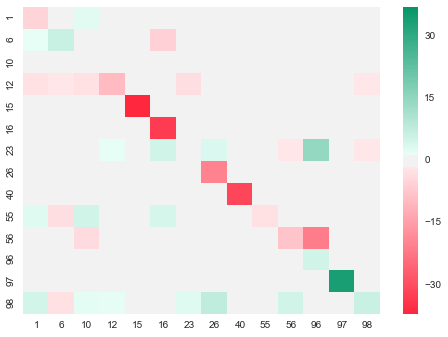

In [196]:
# Plot a heatmap of matchups, where diagonal is player personal average
sns.heatmap(MUscores_df, cmap=cmap)